In [93]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt
import os
from mpdaf.obj import Cube
from mpdaf.drs import PixTable
import astropy.io.fits as fits
import pandas as pd
#from astropy import Table
from matplotlib import rc
import numpy.ma as ma
from PyAstronomy import pyasl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
rc('text', usetex=True)



path_s = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D', 'ESO_DEEP_offset_zapped_objects_sean.fits')
data_s =  fits.getdata(path_s, 1, ignore_missing_end=True)
path_w = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D', 'ESO_DEEP_offset_zapped_objects.fits')
data_w = fits.getdata(path_w, 1, ignore_missing_end=True)

ID_s = data_s['row']
ID_w = data_w['row']

name_s = data_s['name']
name_w = data_w['name']

ql_s = data_s['quality']
ql_w = data_w['quality']

cl_s = data_s['class']
cl_w = data_w['class']

cl_s_num = np.zeros_like(cl_s)
cl_w_num = np.zeros_like(cl_w)
classes = ['galaxy', 'star', 'quasar', 'hizgal']
for i in range(4):
    cl_s_num = np.where(cl_s != classes[i], cl_s_num, i)
    cl_w_num = np.where(cl_w != classes[i], cl_w_num, i)
    
cl_s_num = cl_s_num.astype(float)
cl_w_num = cl_w_num.astype(float)


z_s = data_s['redshift']
z_w = data_w['redshift']

ct_s = data_s['comment']
ct_w = data_w['comment']


# ID_ql_diff = np.where(np.abs(ql_s - ql_w) != 0, ID_s, np.nan)
# name_ql_diff = np.where(np.abs(ql_s - ql_w) != 0, name_s, np.nan)

ql_mask = ma.masked_where(np.abs(ql_s - ql_w) == 0, ID_s)
ID_ql_diff = ID_s[~ql_mask.mask]
name_ql_diff = name_s[~ql_mask.mask]
ql_s_diff = ql_s[~ql_mask.mask]
ql_w_diff = ql_w[~ql_mask.mask]

cl_mask = ma.masked_where(np.abs(cl_s_num - cl_w_num) == 0, ID_s)
ID_cl_diff = ID_s[~cl_mask.mask]
name_cl_diff = name_s[~cl_mask.mask]
cl_s_diff = cl_s[~cl_mask.mask]
cl_w_diff = cl_w[~cl_mask.mask]

z_mask = ma.masked_where(np.abs(z_s - z_w) <= 0.2, ID_s)
ID_z_diff = ID_s[~z_mask.mask]
name_z_diff = name_s[~z_mask.mask]
z_s_diff = z_s[~z_mask.mask]
z_w_diff = z_w[~z_mask.mask]

# Table 1
columns_1 = [r"ID", r"Name", r"Sean's qua", r"Will's qua"]
ql_compare_1 = np.stack([ID_ql_diff, name_ql_diff, ql_s_diff, ql_w_diff], axis=1)
Table_1 = pd.DataFrame(ql_compare_1, index=1 + np.arange(len(ID_ql_diff)), columns=columns_1)
Table_1

columns_2 = [r"ID", r"Name", r"Sean's class", r"Will's class"]
ql_compare_2 = np.stack([ID_cl_diff, name_cl_diff, cl_s_diff, cl_w_diff], axis=1)
Table_2 = pd.DataFrame(ql_compare_2, index=1 + np.arange(len(ID_cl_diff)), columns=columns_2)
Table_2

columns_3 = [r"ID", r"Name", r"Sean's class", r"Will's class"]
ql_compare_3 = np.stack([ID_z_diff, name_z_diff, z_s_diff, z_w_diff], axis=1)
Table_3 = pd.DataFrame(ql_compare_3, index=1 + np.arange(len(ID_z_diff)), columns=columns_3)
Table_3

,ID,Name,Sean's qua,Will's qua
1,4,J024033.46-185150.64,2,0
2,5,J024032.76-185147.01,2,1
3,6,J024032.65-185155.69,2,1
4,9,J024030.13-185154.07,2,1
5,19,J024032.88-185115.19,2,0
6,20,J024034.85-185155.74,2,1
7,24,J024032.18-185121.74,2,0
8,28,J024032.93-185123.58,2,1
9,29,J024032.54-185124.35,2,1
10,40,J024031.96-185127.25,0,1


,ID,Name,Sean's class,Will's class
1,18,J024030.41-185158.82,hizgal,galaxy
2,26,J024032.37-185123.10,hizgal,galaxy
3,43,J024033.09-185128.87,galaxy,hizgal
4,61,J024033.07-185137.27,hizgal,galaxy
5,95,J024030.26-185146.20,hizgal,galaxy
6,110,J024030.67-185155.36,hizgal,galaxy
7,115,J024031.31-185156.95,hizgal,galaxy
8,116,J024033.37-185156.42,hizgal,galaxy
9,117,J024030.61-185157.02,hizgal,galaxy
10,118,J024035.07-185156.63,hizgal,galaxy


,ID,Name,Sean's class,Will's class
1,12,J024031.47-185209.98,1.3908999999999985,0.0
2,18,J024030.41-185158.82,3.4578314422296748,0.4554999999999987
3,19,J024032.88-185115.19,1.658184871502524,1.4030999999999985
4,21,J024032.66-185118.26,1.4485999999999997,0.0
5,22,J024032.65-185119.30,0.8504999999999986,-0.004800000000000032
6,23,J024032.96-185119.23,1.3029999999999986,-0.002600000000000045
7,25,J024032.11-185122.75,1.2389999999999985,0.0
8,26,J024032.37-185123.10,4.135000000000546,0.09559999999999998
9,31,J024031.65-185126.40,0.9873999999999986,1.2811999999999997
10,34,J024033.03-185127.39,0.2756999999999988,0.0039000000000000215


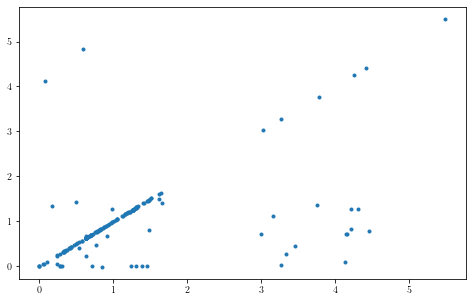

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(z_s, z_w, '.')